#Analyzing the Amplitude Envelopes of different music generes

Amplitude Envelope:


*   Time domain audio feature extracted from raw audio waveform.
*   The maximum amplitude values among all samples in each frame make up the signal's Amplitude Envelope. This feature provides rough estimation of loudness.


*   It is however, sensitive to outliers. This feature has been extensively used for onset detection and music genre classification.

*   However, it is sensitive to outliers (more than Root Mean Square (RMS) Energy audio feature). This feature has been widely employed in the identification of onsets and the classification of music genres.






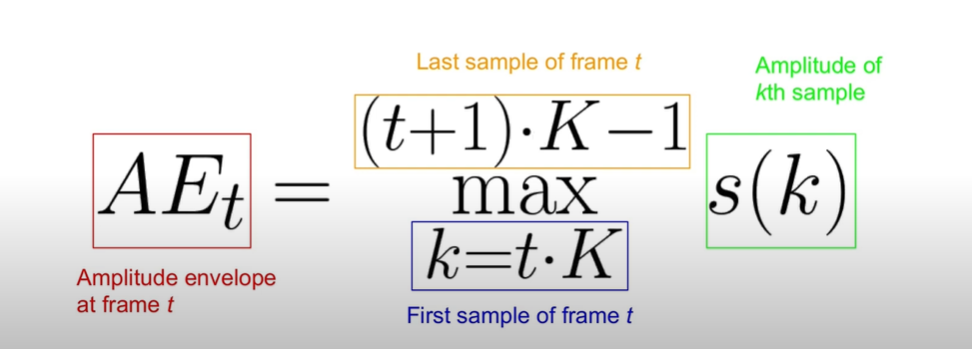

In [1]:
!pip install librosa

In [2]:
#importing all the necessary libraries
from IPython.display import Audio
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#load audio files
classical_music_file = "/content/drive/MyDrive/trytheseaudios/classical.00000.wav"
blues_music_file = "/content/drive/MyDrive/trytheseaudios/blues.00000.wav"


reggae_music_file = "/content/drive/MyDrive/trytheseaudios/reggae.00000.wav"
rock_music_file = "/content/drive/MyDrive/trytheseaudios/rock.00000.wav"

jazz_music_file = "/content/drive/MyDrive/trytheseaudios/jazz.00000.wav"


In [4]:
Audio(classical_music_file)

In [5]:
Audio(blues_music_file)

In [6]:
Audio(reggae_music_file)

In [7]:
Audio(rock_music_file)

Default behaviour of load is to load audio signal as mono

In [8]:
classical, sr = librosa.load(classical_music_file)
blues, _ = librosa.load(blues_music_file)
reggae, _ = librosa.load(reggae_music_file)
rock, _ = librosa.load(rock_music_file)
jazz, _ = librosa.load(jazz_music_file)

In [9]:
classical

array([-0.02008057, -0.01748657,  0.00418091, ...,  0.01934814,
        0.027771  ,  0.03131104], dtype=float32)

same we can do for rest of the music files. I want to bring to notice, that librosa normalizes the signal.

In [10]:
sample_duration_classical = 1/sr
duration_of_classical_signal = sample_duration_classical * len(classical)
print(f"Duration of one sample is : {sample_duration_classical : .6f} seconds")
print(f"Duration of the audio signal is: {duration_of_classical_signal : .6f} seconds")

Duration of one sample is :  0.000045 seconds
Duration of the audio signal is:  30.013333 seconds


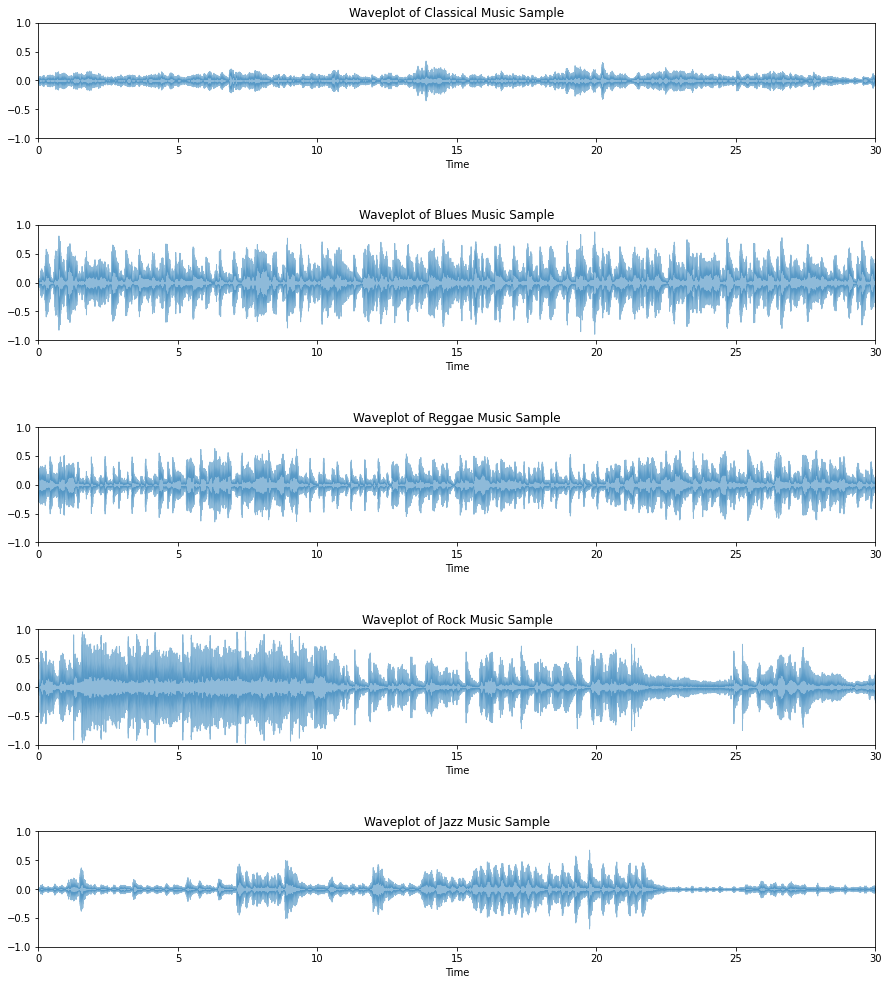

In [11]:
#visualizing the waveforms

plt.figure(figsize=(15, 17))

plt.subplot(5,1,1)
librosa.display.waveplot(classical, alpha=0.5)
plt.title("Waveplot of Classical Music Sample")
plt.ylim(-1,1)

plt.subplot(5,1,2)
librosa.display.waveplot(blues, alpha=0.5)
plt.title("Waveplot of Blues Music Sample")
plt.ylim(-1,1)


plt.subplot(5,1,3)
librosa.display.waveplot(reggae, alpha=0.5)
plt.title("Waveplot of Reggae Music Sample")
plt.ylim(-1,1)

plt.subplot(5,1,4)
librosa.display.waveplot(rock, alpha=0.5)
plt.title("Waveplot of Rock Music Sample")
plt.ylim(-1,1)


plt.subplot(5,1,5)
librosa.display.waveplot(jazz, alpha=0.5)
plt.title("Waveplot of Jazz Music Sample")
plt.ylim(-1,1)

plt.subplots_adjust(hspace = 0.75)




In [12]:
FRAME_SIZE = 1024
HOP_LENGTH =128
#Calculating the amplitude envelope
def amplitude_envelope(signal, frame_size, hop_length):
  return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [13]:
#Amplitude Envelope for individual genre
ae_classical = amplitude_envelope(classical, FRAME_SIZE, HOP_LENGTH)
ae_blues = amplitude_envelope(blues, FRAME_SIZE, HOP_LENGTH)
ae_reggae = amplitude_envelope(reggae, FRAME_SIZE, HOP_LENGTH)
ae_rock = amplitude_envelope(rock, FRAME_SIZE, HOP_LENGTH)
ae_jazz = amplitude_envelope(jazz,FRAME_SIZE, HOP_LENGTH)


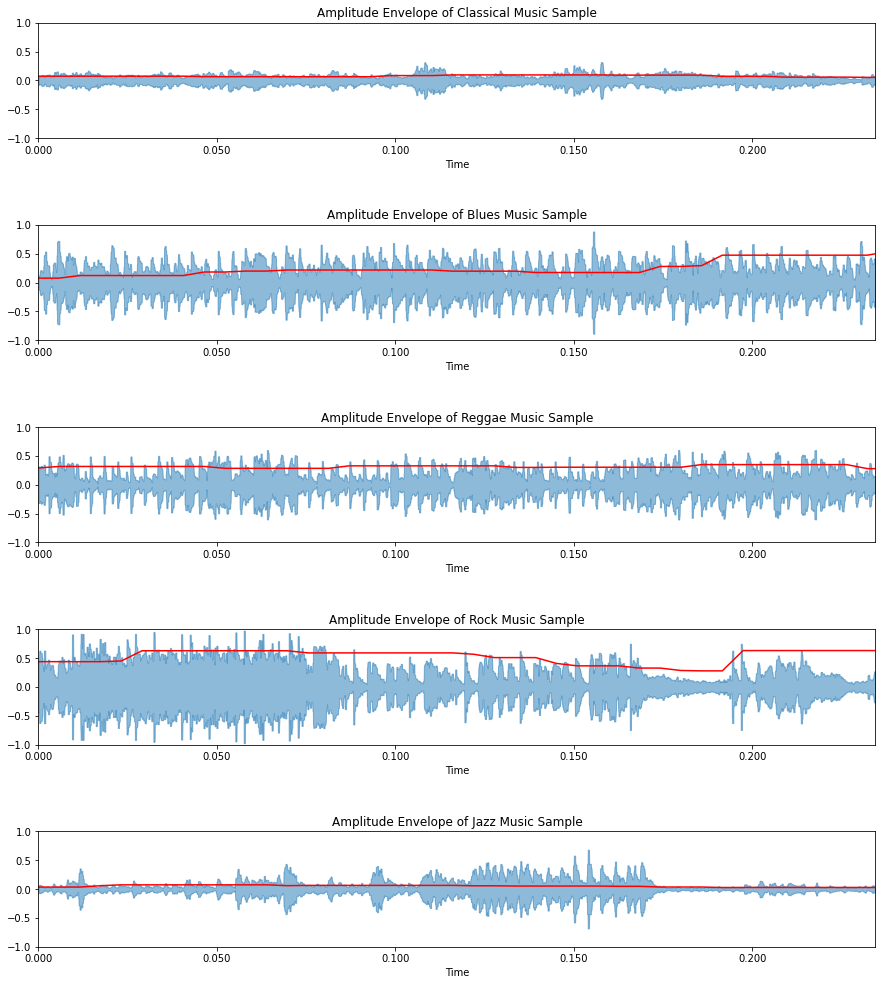

In [14]:
#visualizing Amplitude Envelope


frames = range(0, ae_classical.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

plt.subplot(5,1,1)
librosa.display.waveplot(ae_classical, alpha=0.5)
plt.plot(t, ae_classical, color="r")
plt.title("Amplitude Envelope of Classical Music Sample")
plt.ylim(-1,1)

plt.subplot(5,1,2)
librosa.display.waveplot(ae_blues, alpha=0.5)
plt.plot(t, ae_blues, color="r")
plt.title("Amplitude Envelope of Blues Music Sample")
plt.ylim(-1,1)


plt.subplot(5,1,3)
librosa.display.waveplot(ae_reggae, alpha=0.5)
plt.plot(t, ae_reggae, color="r")
plt.title("Amplitude Envelope of Reggae Music Sample")
plt.ylim(-1,1)

plt.subplot(5,1,4)
librosa.display.waveplot(ae_rock, alpha=0.5)
plt.plot(t, ae_rock, color="r")
plt.title("Amplitude Envelope of Rock Music Sample")
plt.ylim(-1,1)


plt.subplot(5,1,5)
librosa.display.waveplot(ae_jazz, alpha=0.5)
plt.plot(t, ae_jazz, color="r")
plt.title("Amplitude Envelope of Jazz Music Sample")
plt.ylim(-1,1)

plt.subplots_adjust(hspace = 0.75)

References:

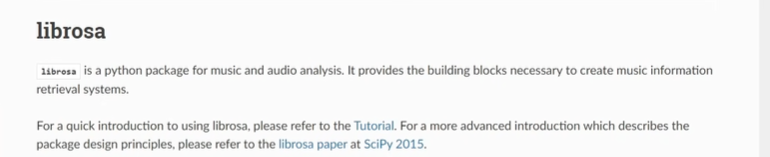

https://devopedia.org/audio-feature-extraction